[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cyneuro/Borgers-Examples-in-BMTK/blob/main/28-Weakly_Coupled/28_Weakly_Coupled_model.ipynb)

# 28- Weakly Coupled Oscillators
#### by Matthew Stroud and Gregory Glickert

In [17]:
import math

def ceiling(x):
    if isinstance(x, int):
        return math.ceil(x)+1
    else:
        return math.ceil(x)

#### Plotting approximation

In [18]:
import math

def g(phi):
    e=phi%1;
    num = (e**2)*(1-e)
    return num

In [19]:
import math
phi_B_0=0.4                    

epsilon=0.5                     
    
dt=0.01  
dt05=dt/2                       


phi_A=0 
phi_B=phi_B_0                   
num_spikes_A=1 
num_spikes_B=0                
                                
                               
                                
t_spikes_A=[0]
t_spikes_B=[]                   

t_vec = []
t_vec.append(0)                    
ij=1                           

psi_vec=[] 
psi_vec.append(phi_B-phi_A)        
                              
                                
t_final=6/epsilon              
                              
t=0 
delta = []
delta = [0 for i in range(2)]
while t<t_final: 
    delta[0]=ceiling(phi_A)-phi_A
    delta[1]=ceiling(phi_B)-phi_B
    if delta[1]<delta[0]:  
        t=t+delta[1]
        num_spikes_B=num_spikes_B+1
        t_spikes_B.append(t)
        phi_A=round(phi_A+delta[1],4)
        phi_A=round(phi_A+epsilon*g(phi_A) ,4)
        phi_B=round(math.ceil(phi_B),4)
        ij=ij+1
        t_vec.append(t)
        psi_vec.append(round(phi_B-phi_A,4))
    else:
        t=t+delta[0]
        num_spikes_A=num_spikes_A+1
        t_spikes_A.append(t)
        phi_B=round(phi_B+delta[0],4)
        phi_B=round(phi_B+epsilon*g(phi_B),4)
        phi_A=round(math.ceil(phi_A),4)
        ij=ij+1
        t_vec.append(t)
        psi_vec.append(phi_B-phi_A)

In [20]:
m_steps=round(t_final/dt)
psi = []


psi.append(phi_B_0)
for k in range(m_steps+1):                    # Now solve the differential equation.
    psi_inc=epsilon*(g(psi[k])-g(-psi[k]))   
    psi_tmp=psi[k]+dt05*psi_inc
    psi_inc=epsilon*(g(psi_tmp)-g(-psi_tmp))
    psi.append(psi[k]+dt*psi_inc)

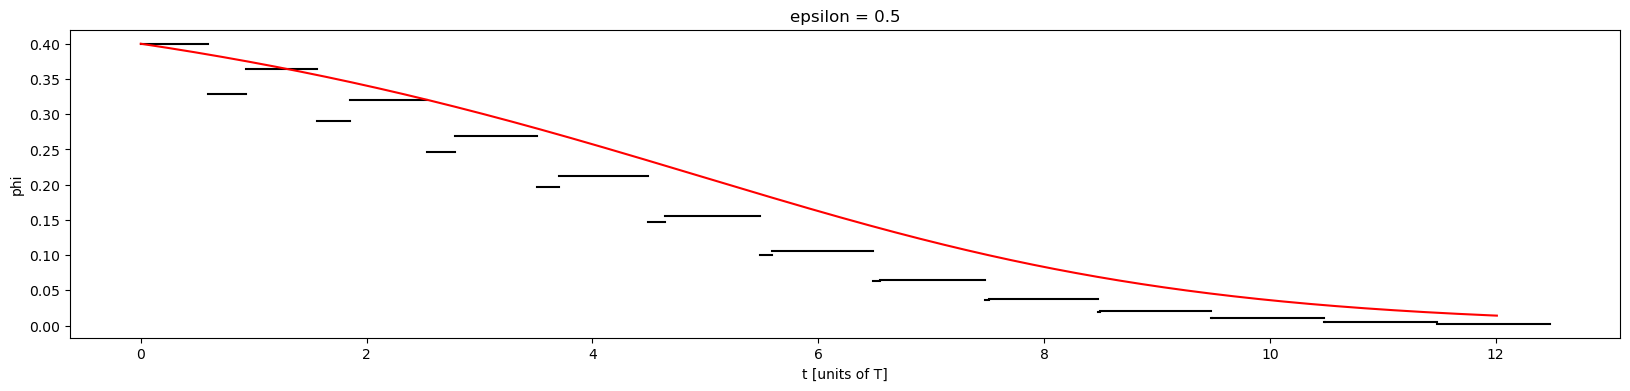

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))
plt.title('epsilon = 0.5')
plt.xlabel('t [units of T]')
plt.ylabel('phi')
for n in range(ij-1):
    plt.plot([t_vec[n],t_vec[n+1]],[psi_vec[n],psi_vec[n]], 'k')
steps = []
for i in range(m_steps+2):
    steps.append(i*dt)
plt.plot(steps,psi, 'r')
plt.show()

#### Shrinking small factor to 0.1: Approximation of g()

In [22]:
import math
phi_B_0=0.4                    

epsilon=0.1                    
    
dt=0.01  
dt05=dt/2                       


phi_A=0 
phi_B=phi_B_0                   
num_spikes_A=1 
num_spikes_B=0                
                                
                               
                                
t_spikes_A=[0]
t_spikes_B=[]                   

t_vec = []
t_vec.append(0)                    
ij=1                           

psi_vec=[] 
psi_vec.append(phi_B-phi_A)        
                              
                                
t_final=6/epsilon              
                              
t=0 
delta = []
delta = [0 for i in range(2)]
while t<t_final: 
    delta[0]=ceiling(phi_A)-phi_A
    delta[1]=ceiling(phi_B)-phi_B
    if delta[1]<delta[0]:  
        t=t+delta[1]
        num_spikes_B=num_spikes_B+1
        t_spikes_B.append(t)
        phi_A=round(phi_A+delta[1],4)
        phi_A=round(phi_A+epsilon*g(phi_A) ,4)
        phi_B=round(math.ceil(phi_B),4)
        ij=ij+1
        t_vec.append(t)
        psi_vec.append(round(phi_B-phi_A,4))
    else:
        t=t+delta[0]
        num_spikes_A=num_spikes_A+1
        t_spikes_A.append(t)
        phi_B=round(phi_B+delta[0],4)
        phi_B=round(phi_B+epsilon*g(phi_B),4)
        phi_A=round(math.ceil(phi_A),4)
        ij=ij+1
        t_vec.append(t)
        psi_vec.append(phi_B-phi_A)

In [23]:
m_steps=round(t_final/dt)
psi = []


psi.append(phi_B_0)
for k in range(m_steps+1):                    # Now solve the differential equation.
    psi_inc=epsilon*(g(psi[k])-g(-psi[k]))   
    psi_tmp=psi[k]+dt05*psi_inc
    psi_inc=epsilon*(g(psi_tmp)-g(-psi_tmp))
    psi.append(psi[k]+dt*psi_inc)

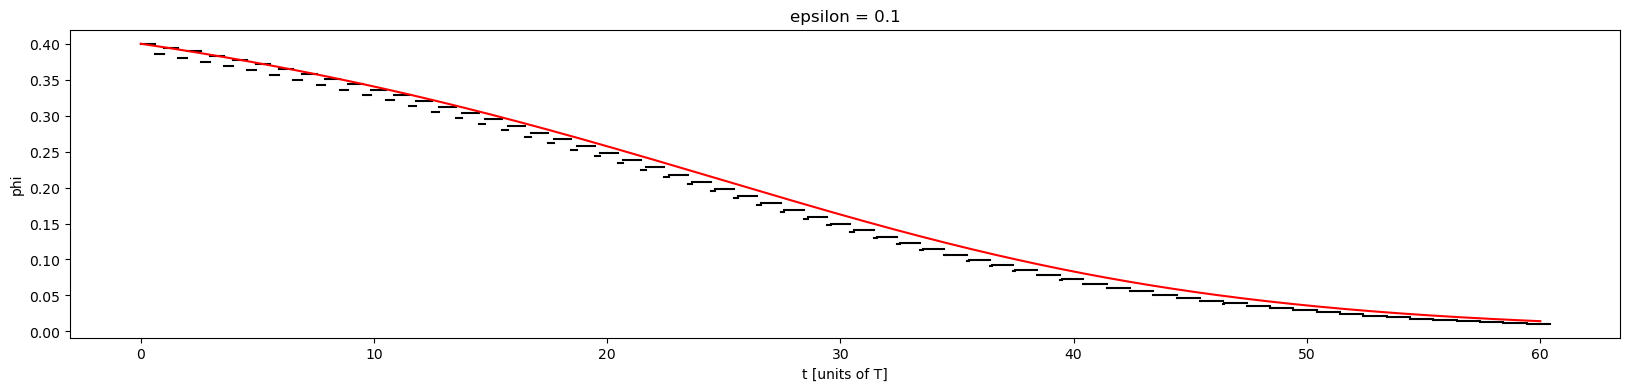

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))
plt.title('epsilon = 0.1')
plt.xlabel('t [units of T]')
plt.ylabel('phi')
for n in range(ij-1):
    plt.plot([t_vec[n],t_vec[n+1]],[psi_vec[n],psi_vec[n]], 'k')
steps = []
for i in range(m_steps+2):
    steps.append(i*dt)
plt.plot(steps,psi, 'r')
plt.show()